In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/Users/bharatheeshls/Downloads/raw_dataset_week4.csv")

# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   Gender              500 non-null    object 
 3   Income              450 non-null    float64
 4   Spending_Score      500 non-null    int64  
 5   Credit_Score        450 non-null    float64
 6   Loan_Amount         450 non-null    float64
 7   Previous_Defaults   500 non-null    int64  
 8   Marketing_Spend     500 non-null    int64  
 9   Purchase_Frequency  500 non-null    int64  
 10  Seasonality         500 non-null    object 
 11  Sales               500 non-null    int64  
 12  Customer_Churn      500 non-null    int64  
 13  Defaulted           500 non-null    int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 54.8+ KB
None
   Customer_ID  Age  Gender    Income  Spen

In [2]:
# Fill missing values with column mean
df['Income'].fillna(df['Income'].mean(), inplace=True)
df['Credit_Score'].fillna(df['Credit_Score'].mean(), inplace=True)
df['Loan_Amount'].fillna(df['Loan_Amount'].mean(), inplace=True)


/var/folders/gd/xc4sqkw17z9dzb81bfn98vwh0000gn/T/ipykernel_82686/3753925596.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean(), inplace=True)
/var/folders/gd/xc4sqkw17z9dzb81bfn98vwh0000gn/T/ipykernel_82686/3753925596.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [3]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(dataframe, columns):
    for col in columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        dataframe = dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]
    return dataframe

# Apply to selected numeric columns
numeric_cols = ['Income', 'Credit_Score', 'Loan_Amount', 'Sales']
df_cleaned = remove_outliers_iqr(df, numeric_cols)


In [5]:
import os

# Save to your Mac's Desktop
desktop_path = os.path.expanduser("//Users/bharatheeshls/Downloads/cleaned_dataset_week4.csv")
df_cleaned.to_csv(desktop_path, index=False)
print(f"Cleaned dataset saved to: {desktop_path}")


Cleaned dataset saved to: //Users/bharatheeshls/Downloads/cleaned_dataset_week4.csv


In [6]:
import pandas as pd

# Load cleaned data
df = pd.read_csv("/Users/bharatheeshls/Downloads/cleaned_dataset_week4.csv")


In [7]:
# Convert 'Seasonality' and 'Gender' to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Seasonality', 'Gender'], drop_first=True)


In [9]:
print(df.columns)


Index(['Customer_ID', 'Age', 'Income', 'Spending_Score', 'Credit_Score',
       'Loan_Amount', 'Previous_Defaults', 'Marketing_Spend',
       'Purchase_Frequency', 'Sales', 'Customer_Churn', 'Defaulted',
       'Seasonality_Low', 'Seasonality_Medium', 'Gender_Male'],
      dtype='object')


In [10]:
# List available columns to check which dummy columns exist
available_cols = df.columns.tolist()

# Create feature list safely
features = [
    'Marketing_Spend', 'Purchase_Frequency', 'Income', 'Loan_Amount',
    'Seasonality_Medium' if 'Seasonality_Medium' in available_cols else None,
    'Seasonality_High' if 'Seasonality_High' in available_cols else None,
    'Gender_Male' if 'Gender_Male' in available_cols else None
]

# Remove any None values
features = [f for f in features if f is not None]

# Select features
X = df[features]
y = df['Sales']


In [12]:
from sklearn.model_selection import train_test_split

# Split the updated feature set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)


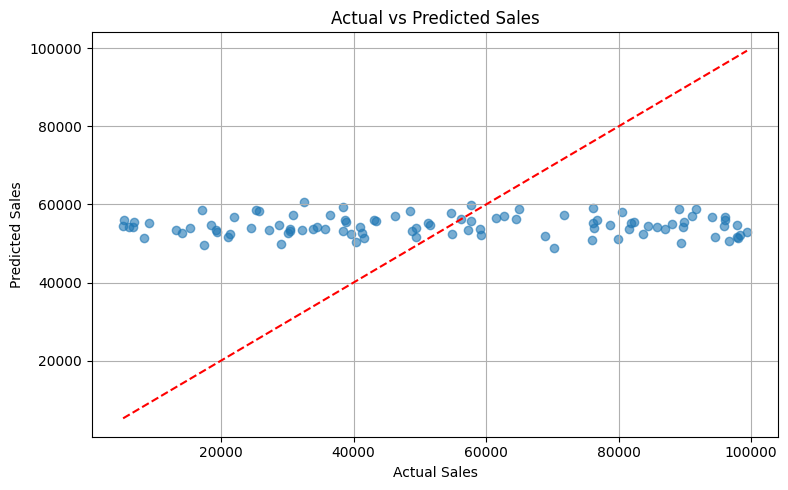

In [14]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, predictions, alpha=0.6)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# Save a CSV with actual and predicted values
results = pd.DataFrame({
    'Actual_Sales': y_test,
    'Predicted_Sales': predictions
})
results.to_csv("/Users/bharatheeshls/Downloads/sales_predictions.csv", index=False)
print("Predictions saved to Downloads!")


Predictions saved to Downloads!


In [16]:
# Select features and target
features = ['Income', 'Loan_Amount', 'Credit_Score', 'Marketing_Spend', 'Age']
X = df[features]
y = df['Defaulted']


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        82
           1       1.00      0.06      0.11        18

    accuracy                           0.83       100
   macro avg       0.91      0.53      0.51       100
weighted avg       0.86      0.83      0.76       100



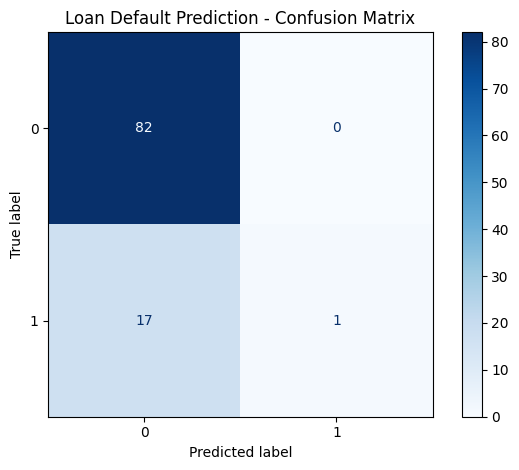

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Loan Default Prediction - Confusion Matrix")
plt.tight_layout()
plt.show()


In [20]:
results = pd.DataFrame({
    'Actual_Default': y_test,
    'Predicted_Default': y_pred
})
results.to_csv("/Users/bharatheeshls/Downloads/default_predictions.csv", index=False)
print("Loan default predictions saved to Downloads!")


Loan default predictions saved to Downloads!
